In [1]:
using Printf, LinearAlgebra, Plots

In [2]:
a,b = 0,π
t_min, t_max = 0,1.5
α = 1
xn = 10
tn = 100
h = (b-a)/xn
k = (t_max-t_min)/tn
λ = k*α/h
cc_x0(t) = exp.(-t)
ci_f(x) = 3*sin.(π*x) .+ 1
ci_g(x) = .-1


ci_g (generic function with 1 method)

In [3]:
di = fill(λ^2,xn-1)
d = fill(2*(1-λ^2),xn)
ds = fill(λ^2,xn-1)
A = Tridiagonal(di, d, ds)
A[xn,xn-1] = 2*λ^2
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
 1.99544     0.00227973   ⋅          …   ⋅           ⋅           ⋅ 
 0.00227973  1.99544     0.00227973      ⋅           ⋅           ⋅ 
  ⋅          0.00227973  1.99544         ⋅           ⋅           ⋅ 
  ⋅           ⋅          0.00227973      ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅             0.00227973   ⋅           ⋅ 
  ⋅           ⋅           ⋅             1.99544     0.00227973   ⋅ 
  ⋅           ⋅           ⋅             0.00227973  1.99544     0.00227973
  ⋅           ⋅           ⋅              ⋅          0.00455945  1.99544

In [4]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = ci_f(LinRange(a,b,xn+1))
S[2:tn+1,1] = cc_x0(LinRange(t_min + k,t_max,tn))
S

101×11 Matrix{Float64}:
 1.0       3.50306  3.75952  1.53919  …  2.7566  3.99739  2.5479  -0.290904
 0.985112  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.970446  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.955997  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.941765  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.927743  0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.913931  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.900325  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.88692   0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.873716  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 ⋮                                    ⋱                            ⋮
 0.251579  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.247833  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.244143  0.0      0.0      0.0         0.0     0

In [5]:
x = LinRange(a,b,xn+1)
for i in 2:length(x)-1
S[2,i] = ci_f(x[i]) + k*ci_g(x[i]) + (k^2/(2*h^2))*(ci_f(x[i-1]) - 2*ci_f(x[i]) + ci_f(x[i+1])) + (k^2/2)*exp(-0)
end
S[2,xn+1] = ci_f(x[xn+1]) + k*ci_g(x[xn+1]) + (k^2/(2*h^2))*(ci_f(x[xn]) - 2*ci_f(x[xn+1]) + ci_f(x[xn]) - 6*h*cos(0)) + + (k^2/2)*exp(-0)
S

101×11 Matrix{Float64}:
 1.0       3.50306  3.75952  1.53919  …  3.99739  2.5479   -0.290904
 0.985112  3.48561  3.74181  1.52375     3.97944  2.53142  -0.301468
 0.970446  0.0      0.0      0.0         0.0      0.0       0.0
 0.955997  0.0      0.0      0.0         0.0      0.0       0.0
 0.941765  0.0      0.0      0.0         0.0      0.0       0.0
 0.927743  0.0      0.0      0.0      …  0.0      0.0       0.0
 0.913931  0.0      0.0      0.0         0.0      0.0       0.0
 0.900325  0.0      0.0      0.0         0.0      0.0       0.0
 0.88692   0.0      0.0      0.0         0.0      0.0       0.0
 0.873716  0.0      0.0      0.0         0.0      0.0       0.0
 ⋮                                    ⋱                     ⋮
 0.251579  0.0      0.0      0.0         0.0      0.0       0.0
 0.247833  0.0      0.0      0.0         0.0      0.0       0.0
 0.244143  0.0      0.0      0.0         0.0      0.0       0.0
 0.240508  0.0      0.0      0.0      …  0.0      0.0       0.0
 0.23692

In [6]:
for j in 3:tn+1
    B = k^2*exp(-(t_min + (j-2)*k))*ones(xn)
    B[1] += λ^2*exp(-(t_min + (j-2)*k))
    B[xn] += -6*h*λ^2*cos(t_min + (j-2)*k)
    S[j,2:xn+1] = A*S[j-1,2:xn+1] - S[j-2,2:xn+1] + B
    end
    S

101×11 Matrix{Float64}:
 1.0        3.50306    3.75952   …   3.99739    2.5479   -0.290904
 0.985112   3.48561    3.74181       3.97944    2.53142  -0.301468
 0.970446   3.46327    3.71868       3.95558    2.51202  -0.303191
 0.955997   3.43605    3.69014       3.92583    2.4897   -0.296155
 0.941765   3.40396    3.65623       3.89022    2.46453  -0.280495
 0.927743   3.36705    3.61697   …   3.84879    2.43655  -0.256397
 0.913931   3.32536    3.57242       3.80159    2.40587  -0.224096
 0.900325   3.27893    3.52264       3.74869    2.37258  -0.183879
 0.88692    3.22785    3.46769       3.69017    2.3368   -0.136076
 0.873716   3.17217    3.40766       3.62611    2.29866  -0.0810655
 ⋮                               ⋱                        ⋮
 0.251579  -1.05773   -1.19182      -0.951237  -3.35505  -4.36539
 0.247833  -0.963658  -1.08772      -0.926058  -3.46678  -4.46537
 0.244143  -0.867054  -0.980826     -0.904021  -3.57493  -4.56149
 0.240508  -0.768121  -0.871372  …  -0.885297  

In [7]:
println("x \t\t S(x,$t_max)")
println()
for (index, S_value) in enumerate(S[tn+1,:])
xi = a + (index-1)*h
@printf("x_%d = %.2f \t S(%.2f,%.2f) = %.4e \n", index, xi, xi, t_max, S_value)
end

x 		 S(x,1.5)

x_1 = 0.00 	 S(0.00,1.50) = 2.2313e-01 
x_2 = 0.31 	 S(0.31,1.50) = -2.4604e-01 
x_3 = 0.63 	 S(0.63,1.50) = -2.9391e-01 
x_4 = 0.94 	 S(0.94,1.50) = 1.2443e-01 
x_5 = 1.26 	 S(1.26,1.50) = 6.4928e-01 
x_6 = 1.57 	 S(1.57,1.50) = 8.9491e-01 
x_7 = 1.88 	 S(1.88,1.50) = 8.9172e-01 
x_8 = 2.20 	 S(2.20,1.50) = 7.2640e-01 
x_9 = 2.51 	 S(2.51,1.50) = -8.4574e-01 
x_10 = 2.83 	 S(2.83,1.50) = -4.1320e+00 
x_11 = 3.14 	 S(3.14,1.50) = -5.0567e+00 


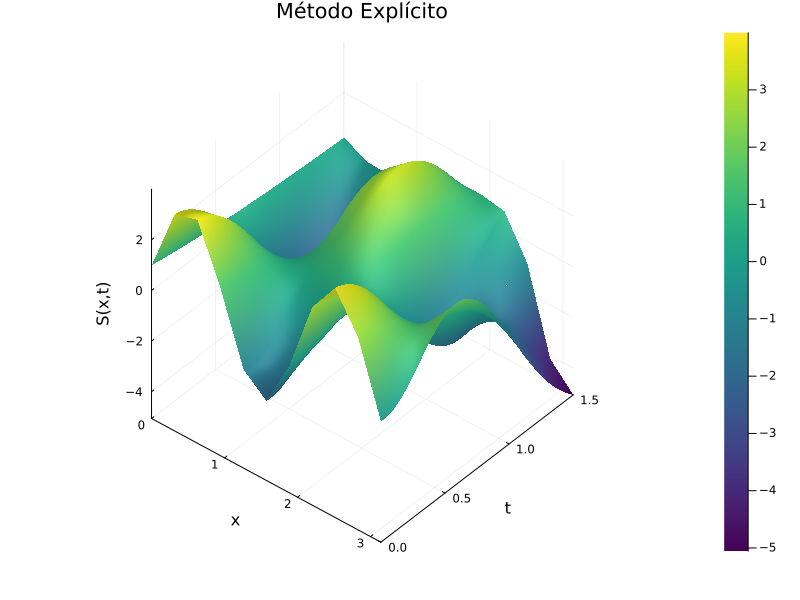

In [8]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)
surface(xs, ys, S, camera=(40,40),size=(800,600), c=:viridis, title="Método Explícito",xlabel="x",ylabel="t",zlabel="S(x,t)")
